# **Loan Prediction.**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Reading the train dataset into the Python environment and checking the basic details.**

In [ ]:
train_data = pd.read_csv('/content/train.csv')
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# to retain the orginal dataset
train = train_data.copy()
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# getting a general idea
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

In [ ]:
# counting null values
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### So the train dataset contains 614 rows and 13 columns, out of which 7 columns contain null values. It includes 8 object-type, 4 float-type, and 1 integer-type columns.

##  **Exploratory Data Analysis and Pre-processing.**



### Obseving the distribution of data in the train dataset.

In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
train['Dependents'].replace('3+', 3,inplace=True)

In [ ]:
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

<ipython-input-10-3b14269d259c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot = True, linewidths=0.2, cmap='YlGnBu')


<Axes: >

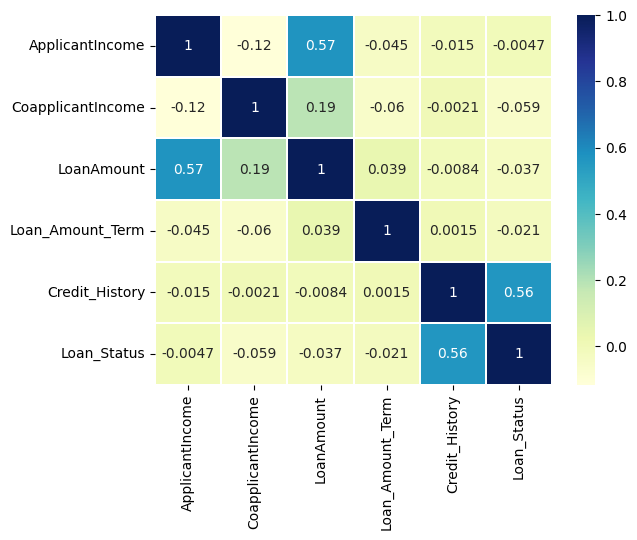

In [ ]:
sns.heatmap(train.corr(),annot = True, linewidths=0.2, cmap='YlGnBu')

## loan amount and applicant income shows a good correlation also is the case with credit history and loan status.

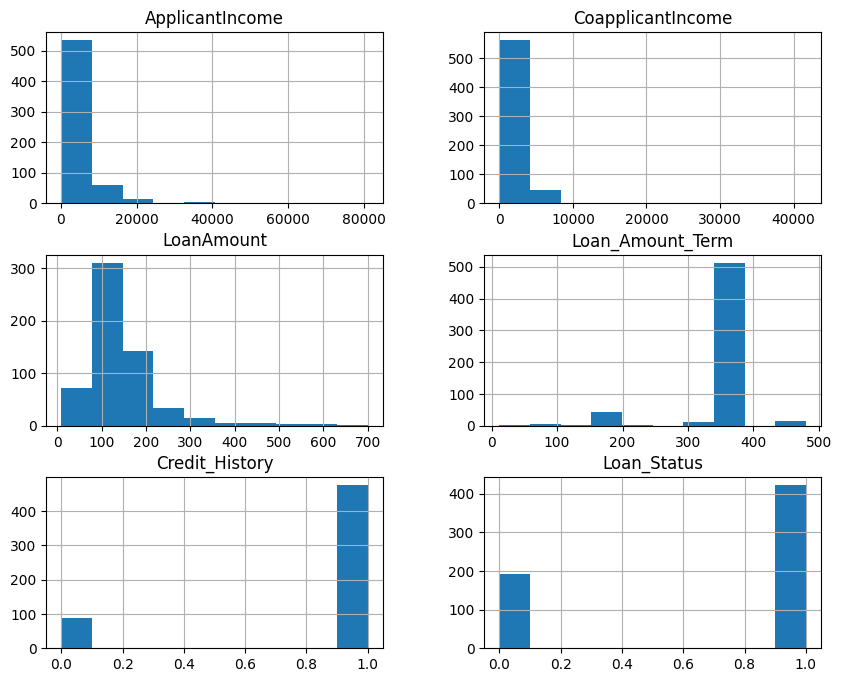

In [ ]:
freq_graph = train
freq_graph.hist(figsize=(10,8));

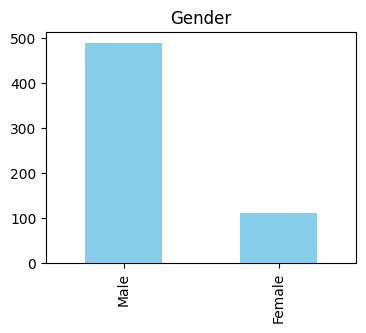

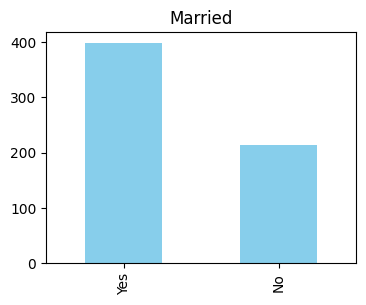

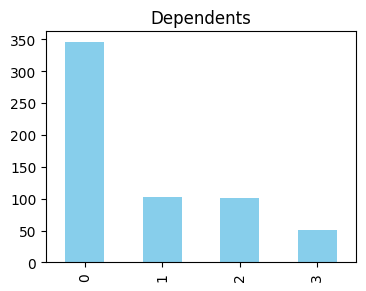

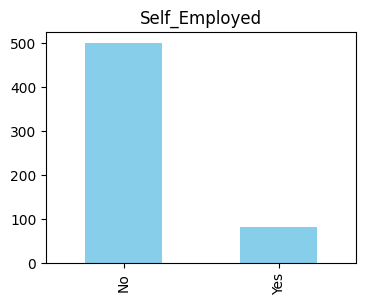

In [ ]:
object_columns = train[['Gender', 'Married','Dependents','Self_Employed']]

for column in object_columns.columns:
    plt.figure(figsize=(4, 3))
    object_columns[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(column)
    plt.show()


In [ ]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
train['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [ ]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
# filling the null values
train[['Gender', 'Married','Dependents','Self_Employed']] = train[['Gender', 'Married','Dependents','Self_Employed']].apply(lambda x: x.fillna(x.mode()[0]))

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)


In [ ]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'ApplicantIncome'),
  Text(1, 0, 'CoapplicantIncome'),
  Text(2, 0, 'LoanAmount'),
  Text(3, 0, 'Loan_Amount_Term'),
  Text(4, 0, 'Credit_History'),
  Text(5, 0, 'Loan_Status')])

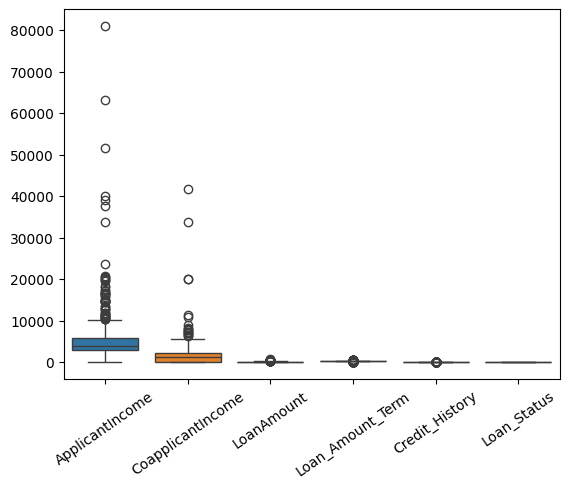

In [ ]:
# finding outliers
sns.boxplot(train)
plt.xticks(rotation = 35)

In [ ]:
# handling outliers
def iqr_clipping(train, out_col):
    for i in out_col:
        Q1 = train[i].quantile(0.25)
        Q3 = train[i].quantile(0.75)
        IQR = Q3 - Q1
        low_lim = Q1 - 1.5 * IQR
        up_lim = Q3 + 1.5 * IQR
        train[i] = train[i].clip(lower=low_lim, upper=up_lim)

    return train  # Ensure to return the modified DataFrame

out_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
train = iqr_clipping(train, out_col)

# applicant income and coaplicant income showed large number of outliers than others.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'ApplicantIncome'),
  Text(1, 0, 'CoapplicantIncome'),
  Text(2, 0, 'LoanAmount'),
  Text(3, 0, 'Loan_Amount_Term'),
  Text(4, 0, 'Credit_History'),
  Text(5, 0, 'Loan_Status')])

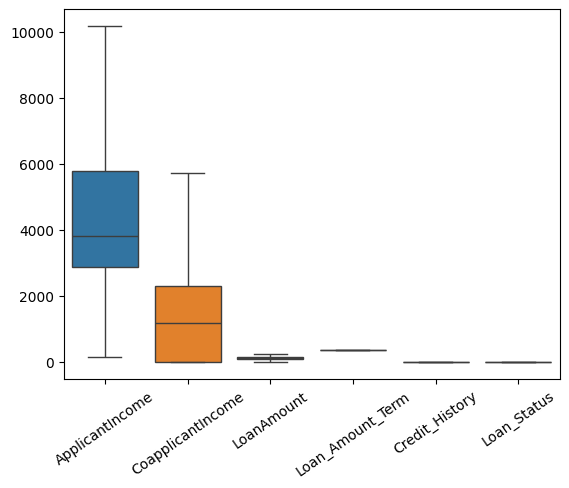

In [ ]:
sns.boxplot(train)
plt.xticks(rotation = 35)

<Axes: xlabel='Loan_Status', ylabel='count'>

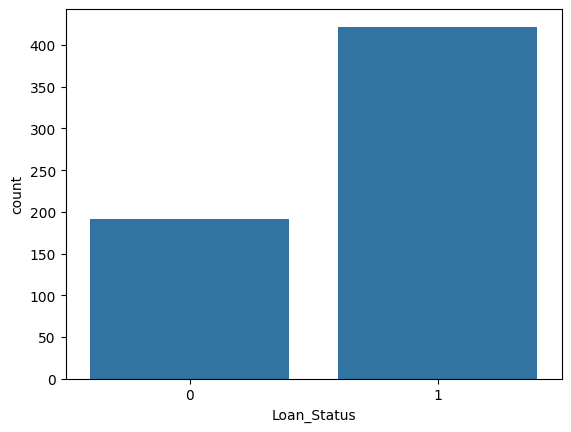

In [ ]:
sns.countplot(x = train['Loan_Status'])

In [ ]:
# label encoding
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

# Columns to label encode
#en_cols = ['Gender', 'Married', 'Dependents','Education', 'Self_Employed', 'Property_Area']

#for col in en_cols:
 #  train[col] = le.fit_transform(train[col])
#train
# one-hot encoding is applied as algorithm like logistic regression  might benefit more from it.

In [ ]:
train=train.drop('Loan_ID',axis=1)

In [ ]:
train=pd.get_dummies(train)

In [ ]:
train.shape

(614, 21)

## **Modelling.**

In [ ]:
# identifying the target(y) and feature(x) variables
y = train['Loan_Status']
x = train.drop('Loan_Status',axis = 1)

# dividing 25% of data to test and 75% of data to train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = .3)

# classification metric
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score,confusion_matrix

In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

## **MODEL1: LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_model = log_reg.fit(x_train_scaled,y_train)
y_log_pred = log_reg.predict(x_test_scaled)
y_log_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
acc_log_reg = accuracy_score(y_test,y_log_pred)
acc_log_reg

0.6324324324324324

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1,penalty ='l2')
log_model1 = log_reg.fit(x_train_scaled,y_train)
y_log_pred = log_reg.predict(x_test_scaled)
acc_log_reg1 = accuracy_score(y_test,y_log_pred)
acc_log_reg1

0.6324324324324324

## **MODEL 2: KNN**

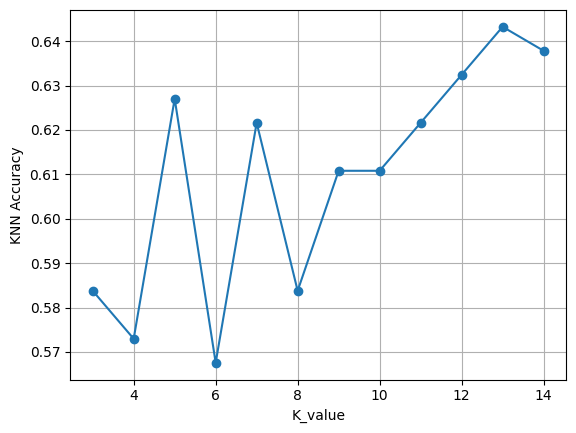

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski',p = 2)
  knn_model = classifier.fit(x_train_scaled,y_train)
  y_pred_knn  =classifier.predict(x_test_scaled)
  accuracy_knn =  accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy_knn)
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('KNN Accuracy')
plt.grid()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 13 ,metric = 'minkowski',p = 2)
classifier.fit(x_train_scaled,y_train)
y_pred_knn  =classifier.predict(x_test_scaled)
Scaled_knn_Accuracy = accuracy_score(y_test,y_pred_knn)
Scaled_knn_Accuracy

0.6432432432432432

## **SVM**

In [ ]:
#1 linear kernel
from sklearn.svm import SVC
sv_cl_linear= SVC(kernel='linear')
sv_cl_linear.fit(x_train_scaled,y_train)
y_svc_linear_pred = sv_cl_linear.predict(x_test_scaled)
Accuracy_svc_linear = accuracy_score(y_test,y_svc_linear_pred)
Accuracy_svc_linear

0.6486486486486487

In [ ]:
#2 polynomial kernel
from sklearn.svm import SVC
sv_cl_linear= SVC(kernel='poly')
sv_cl_linear.fit(x_train_scaled,y_train)
y_svc_linear_pred = sv_cl_linear.predict(x_test_scaled)
Accuracy_svc_poly = accuracy_score(y_test,y_svc_linear_pred)
Accuracy_svc_poly

0.6594594594594595

In [ ]:
#3 Gaussian (radial basis function) kernel
from sklearn.svm import SVC
sv_cl_rbf = SVC(kernel='rbf')
svm_model = sv_cl_rbf.fit(x_train_scaled,y_train)
y_svc_rbf_pred = sv_cl_rbf.predict(x_test_scaled)
Accuracy_svc_rbf = accuracy_score(y_test,y_svc_rbf_pred)
Accuracy_svc_rbf

0.6594594594594595

## **MODEL 4: DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_model = dt_clf.fit(x_train_scaled,y_train)
y_dt_pred = dt_clf.predict(x_test_scaled)
Accuracy_DT = accuracy_score (y_test, y_dt_pred)
Accuracy_DT

0.6054054054054054

## **MODEL 5: RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_model = rf_clf.fit(x_train_scaled,y_train)
y_rf_pred = rf_clf.predict(x_test_scaled)
Accuracy_RF = accuracy_score (y_test, y_rf_pred)
Accuracy_RF

0.6108108108108108

In [ ]:
# hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
rf_clf1= RandomForestClassifier()
rf_clf1 = RandomForestClassifier(n_estimators = 20,max_depth = 20, min_samples_split = 3,criterion = 'entropy')
rf_clf1_model = rf_clf1.fit(x_train_scaled,y_train)
y_pred1 = rf_clf1.predict(x_test_scaled)
Accuracy_RF1 = accuracy_score (y_test, y_pred1)
Accuracy_RF1

0.6270270270270271

In [ ]:
Accuracy = pd.DataFrame({'Models': ['Logistic Regression', 'KNN','SVM_rbf','Decision Tree', 'Random Forest'],'Accuracies':[acc_log_reg,Scaled_knn_Accuracy,Accuracy_svc_rbf,Accuracy_DT,Accuracy_RF1]})
Accuracy

,Models,Accuracies
0,Logistic Regression,0.632432
1,KNN,0.643243
2,SVM_rbf,0.659459
3,Decision Tree,0.605405
4,Random Forest,0.627027


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold(n_splits =10)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
log_cv_score = cross_val_score(log_model,x,y,cv = stratified_cv)
knn_cv_score = cross_val_score(knn_model,x,y,cv = stratified_cv)
svm_cv_score = cross_val_score(svm_model,x,y,cv = stratified_cv)
dt_cv_score = cross_val_score(dt_model,x,y,cv = stratified_cv)
rf_cv_score = cross_val_score(rf_clf1_model,x,y,cv = stratified_cv)

cv_log = log_cv_score.mean()
knn_cv = knn_cv_score.mean()
svm_cv = svm_cv_score.mean()
dt_cv = dt_cv_score.mean()
rf_cv = rf_cv_score.mean()

cv_scores = pd.DataFrame({'Models':['Logistic Regression','KNN','SVM_rbf','Decision Tree','Random Forest'],'Mean CV Scores':[cv_log,knn_cv,svm_cv,dt_cv,rf_cv]})
cv_scores

,Models,Mean CV Scores
0,Logistic Regression,0.687388
1,KNN,0.643231
2,SVM_rbf,0.687308
3,Decision Tree,0.578027
4,Random Forest,0.628609


In [ ]:
pd.merge(Accuracy,cv_scores,on = 'Models')

,Models,Accuracies,Mean CV Scores
0,Logistic Regression,0.632432,0.687388
1,KNN,0.643243,0.643231
2,SVM_rbf,0.659459,0.687308
3,Decision Tree,0.605405,0.578027
4,Random Forest,0.627027,0.628609


## Observing the accuracies and mean stratified k-fold cross-validation scores, Logistic Regression model performed better than the others.

## **Loading test and submission files.**

In [ ]:
test_data = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')

In [ ]:
submission.shape

(367, 2)

In [ ]:
test = test_data.copy()
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


## Preprocessing the test dataset.

In [ ]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
test=test.drop('Loan_ID',axis=1)

In [ ]:
test['Dependents'].replace('3+', 3,inplace=True)

In [ ]:
test.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
test['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [ ]:
test['LoanAmount'].value_counts()

150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
         ..
71.0      1
157.0     1
93.0      1
61.0      1
98.0      1
Name: LoanAmount, Length: 144, dtype: int64

In [ ]:
test['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
# filling the null values
test[['Gender','Dependents','Self_Employed']] = test[['Gender','Dependents','Self_Employed']].apply(lambda x: x.fillna(x.mode()[0]))

test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace = True)

In [ ]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
# Columns to label encode

#en_cols = ['Gender', 'Married', 'Dependents','Education', 'Self_Employed', 'Property_Area']

#for col in en_cols:
#    test[col] = le.fit_transform(test[col])
#test.head()

In [ ]:
test=pd.get_dummies(test)

In [ ]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1


In [ ]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,128.0,360.0,1.0,1,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583.0,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000.0,0.0,66.0,360.0,1.0,1,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583.0,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000.0,0.0,141.0,360.0,1.0,1,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
test.shape

(367, 20)

In [ ]:
train.shape

(614, 21)

In [ ]:
# predicting on the test set and modifying the submission file
predict_test = log_model.predict(test)
submission['Loan_Status']=predict_test
submission['Loan_ID']=test_data['Loan_ID']

In [ ]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [ ]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [ ]:
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [ ]:
#Saving this new dataset as a csv file

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Submission_Final.csv',index = False)

In [ ]:
df = pd.read_csv('/content/Submission_Final.csv')

In [ ]:
df.shape

(367, 2)